In [715]:
%matplotlib inline

import pandas as pd
import time
import datetime
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import export_graphviz, DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, precision_score, recall_score
from sklearn.datasets import load_breast_cancer, load_boston

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

from sklearn import preprocessing
from sklearn import utils


# Always make it pretty.
plt.style.use('ggplot')

# We get some interger -> float typecast warning from sklean below, this keeps them out of our hair.
import warnings
warnings.filterwarnings('ignore')

import itertools


In [716]:
d = pd.read_csv('data/cleaned_data_together.csv')
def df_cleaner(df):
    df['DateTime'] = pd.to_datetime(df['DateTime'])
    return df
df = df_cleaner(d)

In [717]:
df['MOY'] =df['DateTime']
df['WOY'] =df['DateTime']
def moy(x):
    #test = df_shift_final['DateTime'][x]
    date = datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S")
    return date.month
df['MOY'] = df['MOY'].apply(lambda x : moy(x))

In [718]:
def woy(x):
    #test = df_shift_final['DateTime'][x]
    date = datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S")
    return int(date.strftime("%V"))
df['WOY'] = df['WOY'].apply(lambda x : woy(x))

In [719]:
df.head(2)

,DateTime,Henry Hub Price $/MMBtu,Temp,Production MMCF,Storage BCFE,Reserves BCFE,Consumption MMCF,DOY,MOY,WOY
0,2010-01-01,5.82,26.0317,2197157.0,3117.0,255035.0,1666520.0,1,1,53
1,2010-01-02,5.82,24.2249,2197157.0,3117.0,255035.0,1666520.0,2,1,53


In [720]:
df['one_week_back_temp'] = df['Temp'].shift(7).fillna(method= 'backfill')
df['two_week_back_temp'] = df['Temp'].shift(14).fillna(method= 'backfill')
df['three_week_back_temp'] = df['Temp'].shift(21).fillna(method= 'backfill')
df['four_week_back_temp'] = df['Temp'].shift(28).fillna(method= 'backfill')

In [721]:
df['one_back'] = df['Henry Hub Price $/MMBtu'].shift(6).fillna(method= 'backfill')

In [722]:
DateTime = df.pop('DateTime').values

In [723]:
df.head(2)

,Henry Hub Price $/MMBtu,Temp,Production MMCF,Storage BCFE,Reserves BCFE,Consumption MMCF,DOY,MOY,WOY,one_week_back_temp,two_week_back_temp,three_week_back_temp,four_week_back_temp,one_back
0,5.82,26.0317,2197157.0,3117.0,255035.0,1666520.0,1,1,53,26.0317,26.0317,26.0317,26.0317,5.82
1,5.82,24.2249,2197157.0,3117.0,255035.0,1666520.0,2,1,53,26.0317,26.0317,26.0317,26.0317,5.82


In [724]:
y = df.pop('Henry Hub Price $/MMBtu').values


In [725]:
X = df.values

In [726]:
size = int(len(X) * 0.75)
X_train, X_test, y_train, y_test = X[0:size], X[size:len(X)], y[0:size], y[size:len(y)]

In [301]:
model = RandomForestRegressor()

param_grid = {
    'bootstrap': [True, False],
    'max_depth': [80, 90], #, 100, 110
    'max_features': [2, 3, 4, 5, 8, 13],
    'min_samples_leaf': [3, 4, 5, 10], #, 50, 90
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200] #, 300, 1000, 2000
}
clf = GridSearchCV(model, param_grid, cv=3, n_jobs=-1)
clf.fit(X_train,y_train)
print('Accuracy score: {:.3}'.format(clf.score(X_test, y_test)))

KeyboardInterrupt: 

In [ ]:
clf.best_estimator_

In [692]:
X_train, X_test, y_train, y_test 
history_X = X_train
history_y = y_train
predictions2 = list()
rfr = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=90,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=20,
           min_samples_split=12, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)
rfr_fit = rfr.fit(X_train, y_train)
for t in range(len(y_test)):
    output = rfr_fit.predict(X_test[t].reshape((1,13)))
    yhat = output[0]
    predictions2.append(yhat)
#     obs = y_test[t]
#     history_X = np.append(history_X, X_test[t].reshape((1,6)), axis=0)
#     history_y = np.append(history_y,obs)
    #print('{} of {} predicted={}, expected={}'.format(t, len(y_test), yhat, obs))
pred = np.array(predictions2)
error = mean_squared_error(y_test, predictions2)
print('Test MSE: %.5f' % error)

# plt.plot(test)
# plt.plot(predictions, color='red')
# plt.show()

Test MSE: 0.14753


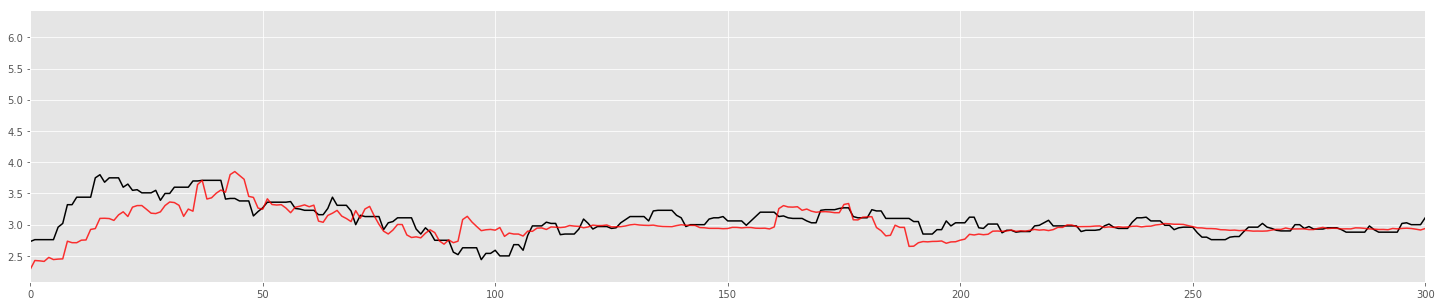

In [693]:
fig, axs = plt.subplots(figsize=(25, 5))
axs.plot(y_test, color='black')
axs.plot(predictions2, color='red', alpha = 0.8)
axs.set_xlim([000, 300])
#axs.set_ylim([-0.2, .2])
plt.show()

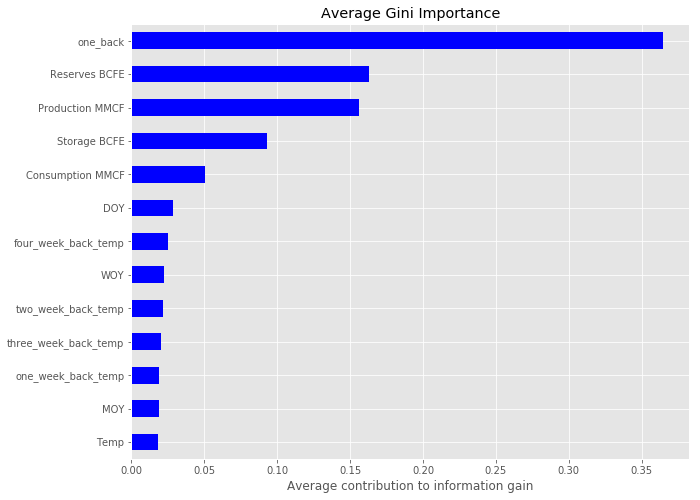

In [694]:
# Plot the feature importance
feat_scores = pd.Series(rfr.feature_importances_,
                           index=df.columns)
feat_scores = feat_scores.sort_values()
ax = feat_scores.plot(kind='barh', 
                      figsize=(10,8),
                      color='b')
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution to information gain');

In [33]:
df.columns

Index(['Temp', 'Production MMCF', 'Storage BCFE', 'Reserves BCFE',
       'Consumption MMCF', 'DOY', 'MOY', 'WOY', 'one_week_back_temp',
       'two_week_back_temp', 'three_week_back_temp', 'four_week_back_temp',
       'one_back'],
      dtype='object')

In [695]:
nol = ['Temp', 'Production MMCF', 'Storage BCFE', 'Reserves BCFE',
       'Consumption MMCF', 'DOY', 'MOY', 'WOY', 'one_week_back_temp',
       'two_week_back_temp', 'three_week_back_temp', 'four_week_back_temp']

In [696]:
nol_df = df[nol]
nol_df.head(2)

,Temp,Production MMCF,Storage BCFE,Reserves BCFE,Consumption MMCF,DOY,MOY,WOY,one_week_back_temp,two_week_back_temp,three_week_back_temp,four_week_back_temp
0,26.0317,2197157.0,3117.0,255035.0,1666520.0,1,1,53,26.0317,26.0317,26.0317,26.0317
1,24.2249,2197157.0,3117.0,255035.0,1666520.0,2,1,53,26.0317,26.0317,26.0317,26.0317


In [697]:
X2 = nol_df.values

In [698]:
size = int(len(X) * 0.75)
X_train, X_test, y_train, y_test = X2[0:size], X2[size:len(X)], y[0:size], y[size:len(y)]

In [38]:
model = RandomForestRegressor()

param_grid = {
    'bootstrap': [True, False],
    'max_depth': [80, 90], #, 100, 110
    'max_features': [2, 3, 4, 5, 8, 12],
    'min_samples_leaf': [3, 4, 5, 10], #, 50, 90
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200] #, 300, 1000, 2000
}
clf = GridSearchCV(model, param_grid, cv=3, n_jobs=-1)
clf.fit(X_train,y_train)
print('Accuracy score: {:.3}'.format(clf.score(X_test, y_test)))

Accuracy score: -0.824


In [39]:
clf.best_estimator_

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=90,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=8, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [699]:
X_train, X_test, y_train, y_test 
history_X = X_train
history_y = y_train
predictions3 = list()
rfr = RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=90,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=8, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)
rfr_fit = rfr.fit(X_train, y_train)
for t in range(len(y_test)):
    output = rfr_fit.predict(X_test[t].reshape((1,12)))
    yhat = output[0]
    predictions3.append(yhat)
#     obs = y_test[t]
#     history_X = np.append(history_X, X_test[t].reshape((1,6)), axis=0)
#     history_y = np.append(history_y,obs)
    #print('{} of {} predicted={}, expected={}'.format(t, len(y_test), yhat, obs))
pred = np.array(predictions3)
error = mean_squared_error(y_test, predictions3)
print('Test MSE: %.5f' % error)

# plt.plot(test)
# plt.plot(predictions, color='red')
# plt.show()

Test MSE: 0.42461


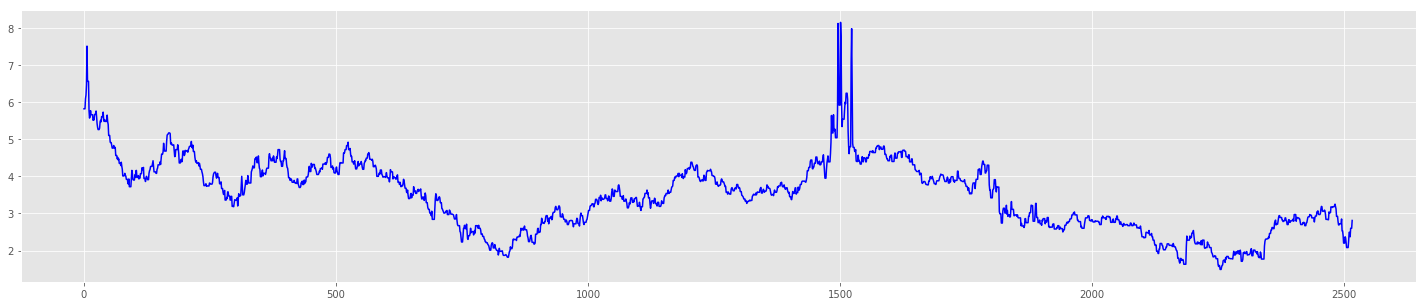

In [700]:
fig, axs = plt.subplots(figsize=(25, 5))
axs.plot(y_train, color='blue')
#axs.plot(predictions3, color='red', alpha = 0.8)
#axs.set_xlim([300, 600])
#axs.set_ylim([-0.2, .2])
plt.show()

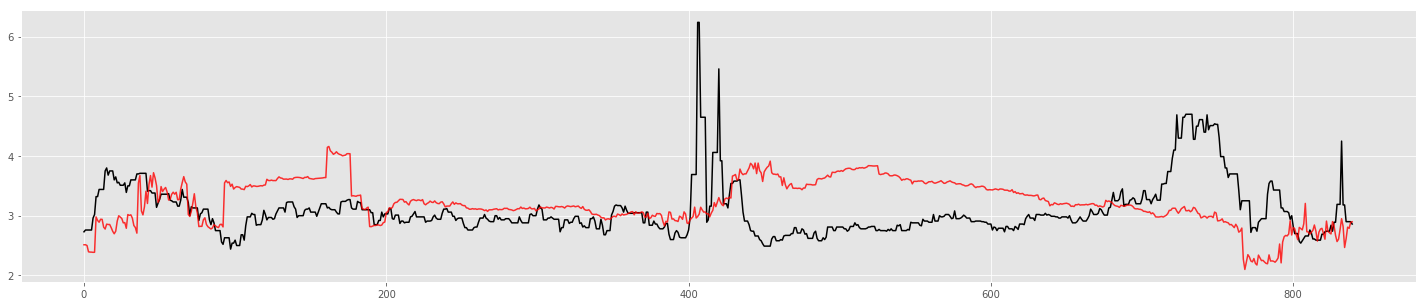

In [701]:
fig, axs = plt.subplots(figsize=(25, 5))
axs.plot(y_test, color='black')
axs.plot(predictions3, color='red', alpha = 0.8)
#axs.plot(y_train, color='blue')
#axs.set_xlim([300, 600])
#axs.set_ylim([-0.2, .2])
plt.show()

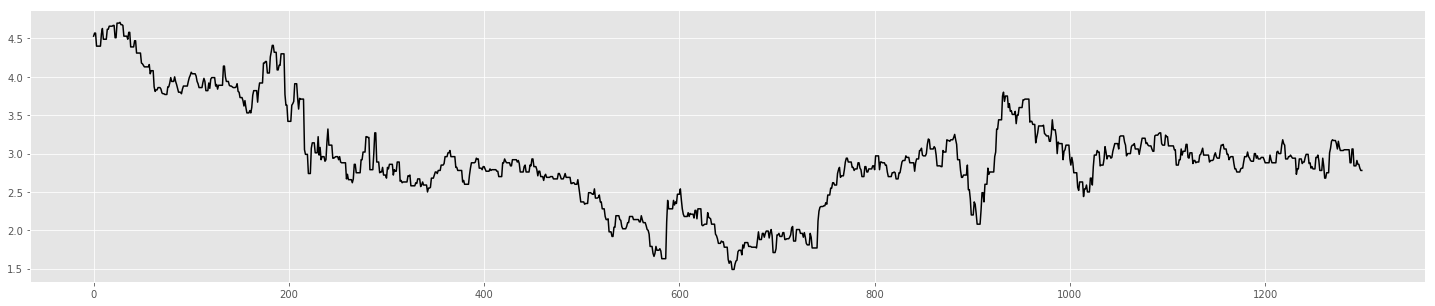

In [324]:
fig, axs = plt.subplots(figsize=(25, 5))
axs.plot(small_y, color='black')
#axs.plot(predictions3, color='red', alpha = 0.8)
#axs.plot(y_train, color='blue')
#axs.set_xlim([300, 600])
#axs.set_ylim([-0.2, .2])
plt.show()

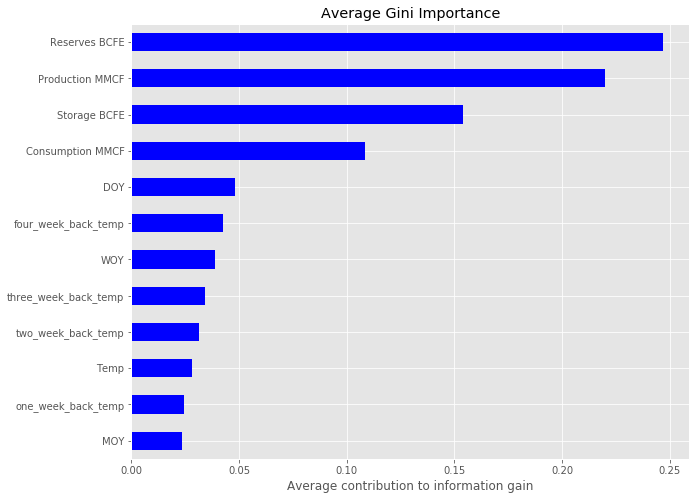

In [79]:
# Plot the feature importance
feat_scores = pd.Series(rfr.feature_importances_,
                           index=nol_df.columns)
feat_scores = feat_scores.sort_values()
ax = feat_scores.plot(kind='barh', 
                      figsize=(10,8),
                      color='b')
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution to information gain');

# without reserves and one day back price

In [702]:
nol2 = ['Temp', 'Production MMCF', 'Storage BCFE',
       'Consumption MMCF', 'DOY', 'MOY', 'WOY', 'one_week_back_temp',
       'two_week_back_temp', 'three_week_back_temp', 'four_week_back_temp']

In [703]:
nol2_df = df[nol2]
nol2_df.head(2)

,Temp,Production MMCF,Storage BCFE,Consumption MMCF,DOY,MOY,WOY,one_week_back_temp,two_week_back_temp,three_week_back_temp,four_week_back_temp
0,26.0317,2197157.0,3117.0,1666520.0,1,1,53,26.0317,26.0317,26.0317,26.0317
1,24.2249,2197157.0,3117.0,1666520.0,2,1,53,26.0317,26.0317,26.0317,26.0317


In [704]:
X3 = nol2_df.values

In [705]:
size = int(len(X) * 0.75)
X_train, X_test, y_train, y_test = X3[0:size], X3[size:len(X)], y[0:size], y[size:len(y)]

In [84]:
model = RandomForestRegressor()

param_grid = {
    'bootstrap': [True, False],
    'max_depth': [80, 90], #, 100, 110
    'max_features': [2, 3, 4, 5, 8, 11],
    'min_samples_leaf': [3, 4, 5, 10], #, 50, 90
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200] #, 300, 1000, 2000
}
clf = GridSearchCV(model, param_grid, cv=3, n_jobs=-1)
clf.fit(X_train,y_train)
print('Accuracy score: {:.3}'.format(clf.score(X_test, y_test)))

KeyboardInterrupt: 

In [50]:
clf.best_estimator_

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=90,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=4,
           min_samples_split=8, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [706]:
X_train, X_test, y_train, y_test 
history_X = X_train
history_y = y_train
predictions4 = list()
rfr = RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=90,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=4,
           min_samples_split=8, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)
rfr_fit = rfr.fit(X_train, y_train)
for t in range(len(y_test)):
    output = rfr_fit.predict(X_test[t].reshape((1,11)))
    yhat = output[0]
    predictions4.append(yhat)
#     obs = y_test[t]
#     history_X = np.append(history_X, X_test[t].reshape((1,6)), axis=0)
#     history_y = np.append(history_y,obs)
    #print('{} of {} predicted={}, expected={}'.format(t, len(y_test), yhat, obs))
pred = np.array(predictions4)
error = mean_squared_error(y_test, predictions4)
print('Test MSE: %.5f' % error)

# plt.plot(test)
# plt.plot(predictions, color='red')
# plt.show()

Test MSE: 0.48457


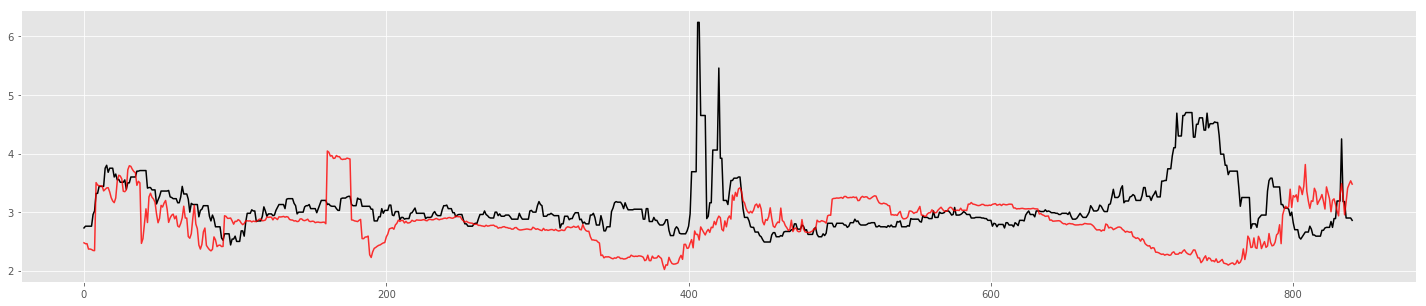

In [707]:
fig, axs = plt.subplots(figsize=(25, 5))
axs.plot(y_test, color='black')
axs.plot(predictions4, color='red', alpha = 0.8)
#axs.set_xlim([300, 600])
#axs.set_ylim([-0.2, .2])
plt.show()

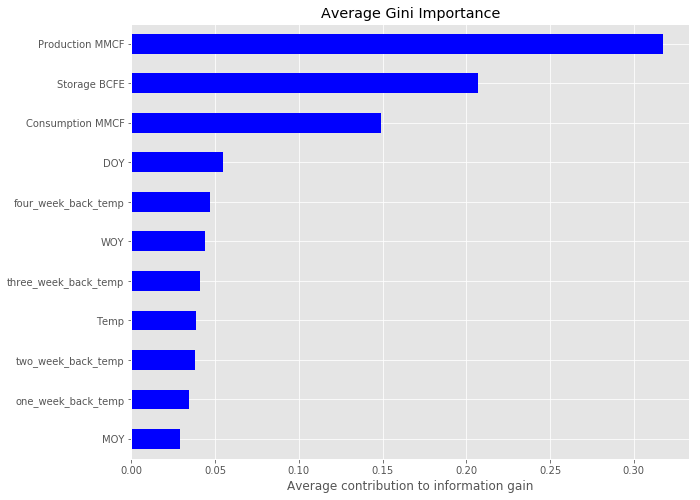

In [87]:
# Plot the feature importance
feat_scores = pd.Series(rfr.feature_importances_,
                           index=nol2_df.columns)
feat_scores = feat_scores.sort_values()
ax = feat_scores.plot(kind='barh', 
                      figsize=(10,8),
                      color='b')
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution to information gain');

In [88]:
X_train, X_test, y_train, y_test 
history_X = X_train
history_y = y_train
predictions5 = list()
rfr = RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=90,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=4,
           min_samples_split=8, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)
rfr_fit = rfr.fit(X_train, y_train)
for t in range(len(y_test)):
    output = rfr_fit.predict(X_test[t].reshape((1,11)))
    yhat = output[0]
    predictions5.append(yhat)
#     obs = y_test[t]
#     history_X = np.append(history_X, X_test[t].reshape((1,6)), axis=0)
#     history_y = np.append(history_y,obs)
    #print('{} of {} predicted={}, expected={}'.format(t, len(y_test), yhat, obs))
pred = np.array(predictions5)
error = mean_squared_error(y_test, predictions5)
print('Test MSE: %.5f' % error)

# plt.plot(test)
# plt.plot(predictions, color='red')
# plt.show()

Test MSE: 0.47972


In [91]:
test = np.array([0]+[(b - a)  for a, b in zip(y[::1], y[1::1])])
len(test), type(test)

(3357, numpy.ndarray)

In [92]:
size = int(len(X) * 0.75)
X_train, X_test, y_train, y_test = X3[0:size], X3[size:len(X)], test[0:size], test[size:len(y)]

In [55]:
model = RandomForestRegressor()

param_grid = {
    'bootstrap': [True, False],
    'max_depth': [80, 90], #, 100, 110
    'max_features': [2, 3, 4, 5, 8, 11],
    'min_samples_leaf': [3, 4, 5, 10], #, 50, 90
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200] #, 300, 1000, 2000
}
clf = GridSearchCV(model, param_grid, cv=3, n_jobs=-1)
clf.fit(X_train,y_train)
print('Accuracy score: {:.3}'.format(clf.score(X_test, y_test)))

Accuracy score: -0.00106


In [56]:
clf.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=80,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=10,
           min_samples_split=8, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [93]:
X_train, X_test, y_train, y_test 
history_X = X_train
history_y = y_train
predictions6 = list()
rfr = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=80,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=10,
           min_samples_split=8, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)
rfr_fit = rfr.fit(X_train, y_train)
for t in range(len(y_test)):
    output = rfr_fit.predict(X_test[t].reshape((1,11)))
    yhat = output[0]
    predictions6.append(yhat)
#     obs = y_test[t]
#     history_X = np.append(history_X, X_test[t].reshape((1,6)), axis=0)
#     history_y = np.append(history_y,obs)
    #print('{} of {} predicted={}, expected={}'.format(t, len(y_test), yhat, obs))
pred = np.array(predictions6)
error = mean_squared_error(y_test, predictions6)
print('Test MSE: %.5f' % error)

# plt.plot(test)
# plt.plot(predictions, color='red')
# plt.show()

Test MSE: 0.03156


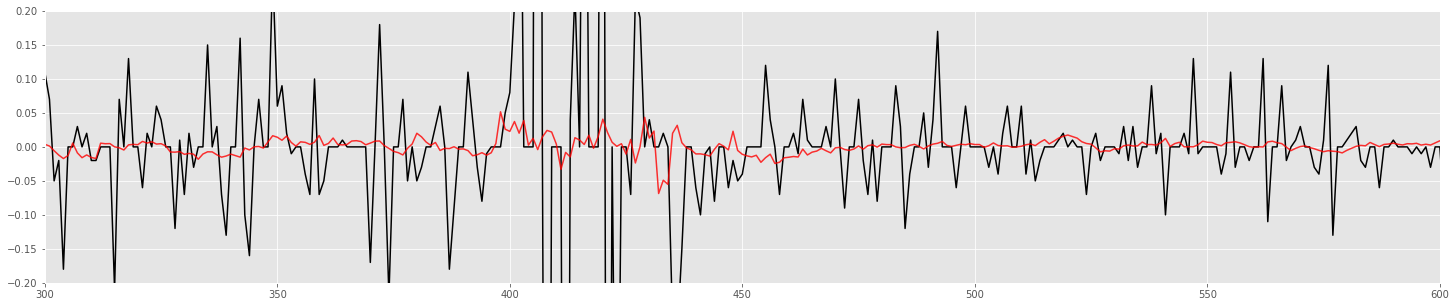

In [94]:
fig, axs = plt.subplots(figsize=(25, 5))
axs.plot(y_test, color='black')
axs.plot(predictions6, color='red', alpha = 0.8)
axs.set_xlim([300, 600])
axs.set_ylim([-0.2, .2])
plt.show()

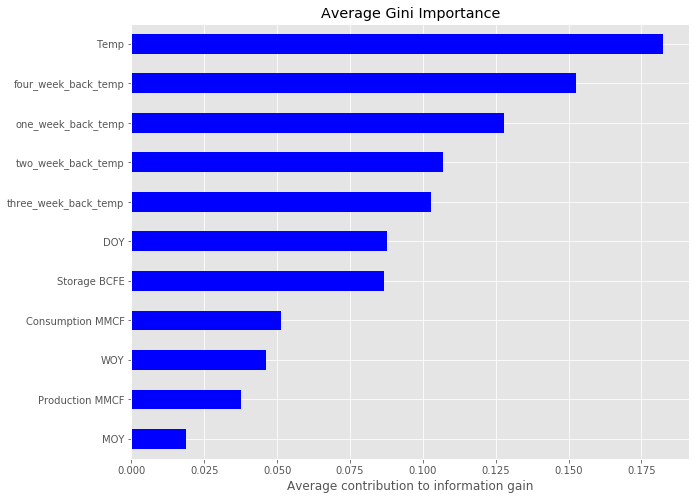

In [95]:
# Plot the feature importance
feat_scores = pd.Series(rfr.feature_importances_,
                           index=nol2_df.columns)
feat_scores = feat_scores.sort_values()
ax = feat_scores.plot(kind='barh', 
                      figsize=(10,8),
                      color='b')
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution to information gain');

In [129]:
nol3 = ['Temp', 'Storage BCFE',
       'Consumption MMCF', 'DOY', 'MOY', 'WOY', 'one_week_back_temp',
       'two_week_back_temp', 'three_week_back_temp', 'four_week_back_temp']

In [130]:
nol3_df = df[nol3]

In [131]:
X4 = nol3_df.values

In [132]:
size = int(len(X) * 0.75)
X_train, X_test, y_train, y_test = X4[0:size], X4[size:len(X)], y[0:size], y[size:len(y)]

In [141]:
X_train, X_test, y_train, y_test 
history_X = X_train
history_y = y_train
predictions7 = list()
rfr = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=80,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=10,
           min_samples_split=8, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)
rfr_fit = rfr.fit(X_train, y_train)
for t in range(len(y_test)):
    output = rfr_fit.predict(X_test[t].reshape((1,10)))
    yhat = output[0]
    predictions7.append(yhat)
#     obs = y_test[t]
#     history_X = np.append(history_X, X_test[t].reshape((1,6)), axis=0)
#     history_y = np.append(history_y,obs)
    #print('{} of {} predicted={}, expected={}'.format(t, len(y_test), yhat, obs))
pred = np.array(predictions7)
error = mean_squared_error(y_test, predictions7)
print('Test MSE: %.5f' % error)

# plt.plot(test)
# plt.plot(predictions, color='red')
# plt.show()

Test MSE: 0.72580


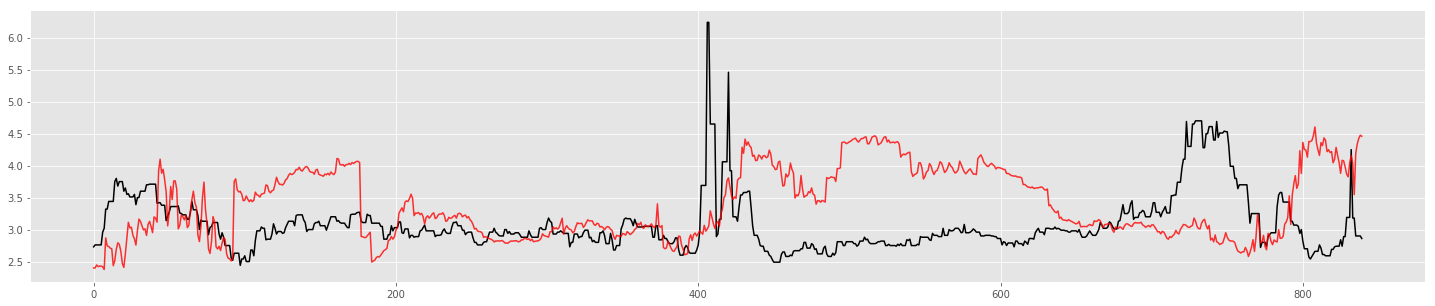

In [142]:
fig, axs = plt.subplots(figsize=(25, 5))
axs.plot(y_test, color='black')
axs.plot(predictions7, color='red', alpha = 0.8)
#axs.set_xlim([300, 600])
#axs.set_ylim([-0.2, .2])
plt.show()

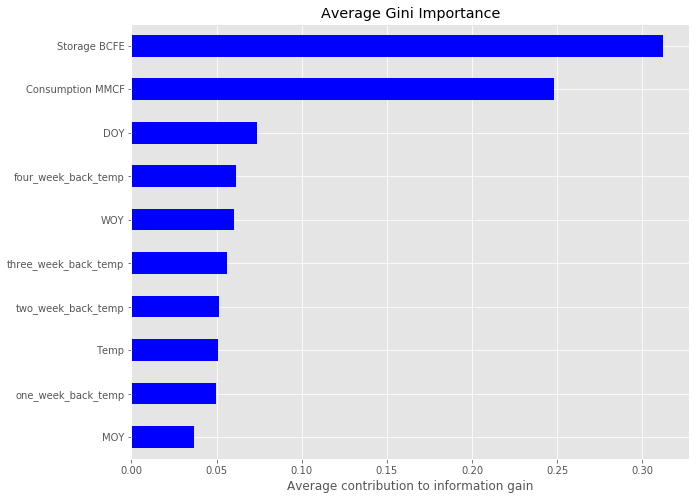

In [140]:
# Plot the feature importance
feat_scores = pd.Series(rfr.feature_importances_,
                           index=nol3_df.columns)
feat_scores = feat_scores.sort_values()
ax = feat_scores.plot(kind='barh', 
                      figsize=(10,8),
                      color='b')
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution to information gain');

# Gradient boosting work

In [164]:
size = int(len(X) * 0.75)
X_train, X_test, y_train, y_test = X[0:size], X[size:len(X)], y[0:size], y[size:len(y)]

In [237]:
X_train, X_test, y_train, y_test 
history_X = X_train
history_y = y_train
predictions8 = list()
gbr = GradientBoostingRegressor(learning_rate=0.1, n_estimators=200, max_leaf_nodes=20, min_samples_leaf =10,
                               max_features=2)
gbr_fit = gbr.fit(X_train, y_train)
for t in range(len(y_test)):
    output = gbr_fit.predict(X_test[t].reshape((1,13)))
    yhat = output[0]
    predictions8.append(yhat)
#     obs = y_test[t]
#     history_X = np.append(history_X, X_test[t].reshape((1,6)), axis=0)
#     history_y = np.append(history_y,obs)
    #print('{} of {} predicted={}, expected={}'.format(t, len(y_test), yhat, obs))
pred = np.array(predictions8)
error = mean_squared_error(y_test, predictions8)
print('Test MSE: %.5f' % error)

# plt.plot(test)
# plt.plot(predictions, color='red')
# plt.show()

Test MSE: 0.25922


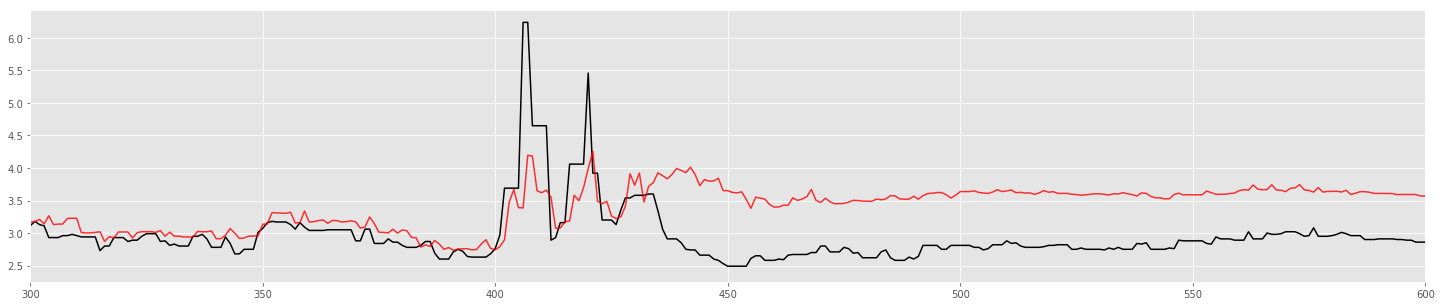

In [238]:
fig, axs = plt.subplots(figsize=(25, 5))
axs.plot(y_test, color='black')
axs.plot(predictions8, color='red', alpha = 0.8)
axs.set_xlim([300, 600])
#axs.set_ylim([-0.2, .2])
plt.show()

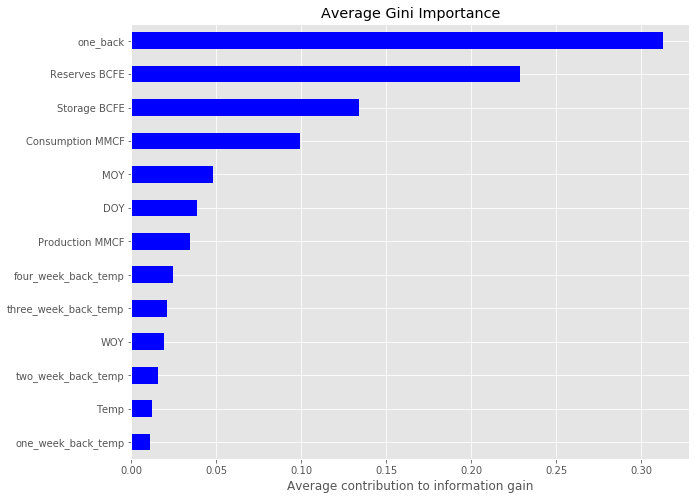

In [239]:
# Plot the feature importance
feat_scores = pd.Series(gbr.feature_importances_,
                           index=df.columns)
feat_scores = feat_scores.sort_values()
ax = feat_scores.plot(kind='barh', 
                      figsize=(10,8),
                      color='b')
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution to information gain');

# with out one day back

In [284]:
X5 = nol2_df.values

In [268]:
size = int(len(X) * 0.75)
X_train, X_test, y_train, y_test = X5[0:size], X5[size:len(X)], y[0:size], y[size:len(y)]

In [277]:
X_train, X_test, y_train, y_test 
history_X = X_train
history_y = y_train
predictions9 = list()
gbr = GradientBoostingRegressor(learning_rate=0.1, n_estimators=200, max_leaf_nodes=20, min_samples_leaf =10,
                               max_features=1)
gbr_fit = gbr.fit(X_train, y_train)
for t in range(len(y_test)):
    output = gbr_fit.predict(X_test[t].reshape((1,11)))
    yhat = output[0]
    predictions9.append(yhat)
#     obs = y_test[t]
#     history_X = np.append(history_X, X_test[t].reshape((1,6)), axis=0)
#     history_y = np.append(history_y,obs)
    #print('{} of {} predicted={}, expected={}'.format(t, len(y_test), yhat, obs))
pred = np.array(predictions9)
error = mean_squared_error(y_test, predictions9)
print('Test MSE: %.5f' % error)

# plt.plot(test)
# plt.plot(predictions, color='red')
# plt.show()

Test MSE: 0.44131


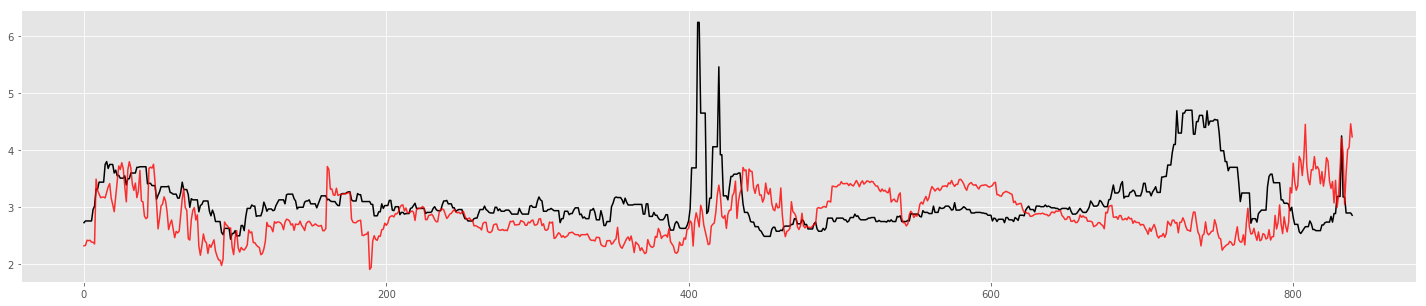

In [278]:
fig, axs = plt.subplots(figsize=(25, 5))
axs.plot(y_test, color='black')
axs.plot(predictions9, color='red', alpha = 0.8)
#axs.set_xlim([300, 600])
#axs.set_ylim([-0.2, .2])
plt.show()

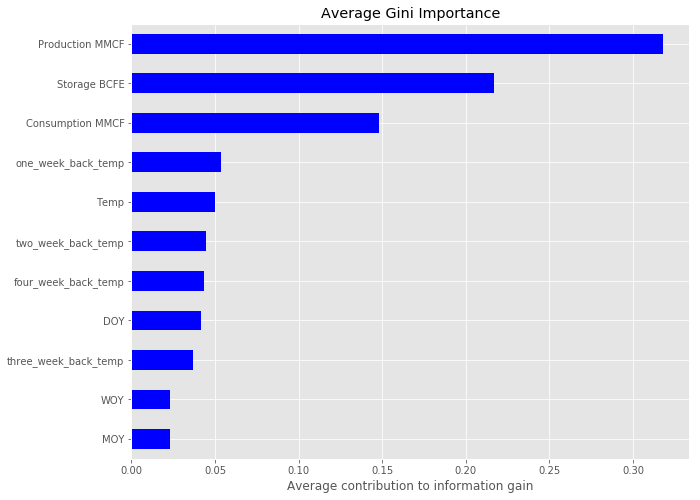

In [280]:
# Plot the feature importance
feat_scores = pd.Series(gbr.feature_importances_,
                           index=nol2_df.columns)
feat_scores = feat_scores.sort_values()
ax = feat_scores.plot(kind='barh', 
                      figsize=(10,8),
                      color='b')
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution to information gain');

In [286]:
nol5 = ['Storage BCFE',
       'DOY', 'MOY', 'WOY', 'one_week_back_temp',
       'two_week_back_temp', 'three_week_back_temp', 'four_week_back_temp']

In [287]:
nol5_df = df[nol5]

In [288]:
X6 = nol5_df.values

In [289]:
size = int(len(X) * 0.75)
X_train, X_test, y_train, y_test = X6[0:size], X6[size:len(X)], y[0:size], y[size:len(y)]

In [291]:
X_train, X_test, y_train, y_test 
history_X = X_train
history_y = y_train
predictions9 = list()
gbr = GradientBoostingRegressor(learning_rate=0.1, n_estimators=200, max_leaf_nodes=20, min_samples_leaf =10,
                               max_features=1)
gbr_fit = gbr.fit(X_train, y_train)
for t in range(len(y_test)):
    output = gbr_fit.predict(X_test[t].reshape((1,8)))
    yhat = output[0]
    predictions9.append(yhat)
#     obs = y_test[t]
#     history_X = np.append(history_X, X_test[t].reshape((1,6)), axis=0)
#     history_y = np.append(history_y,obs)
    #print('{} of {} predicted={}, expected={}'.format(t, len(y_test), yhat, obs))
pred = np.array(predictions9)
error = mean_squared_error(y_test, predictions9)
print('Test MSE: %.5f' % error)

# plt.plot(test)
# plt.plot(predictions, color='red')
# plt.show()

Test MSE: 1.14333


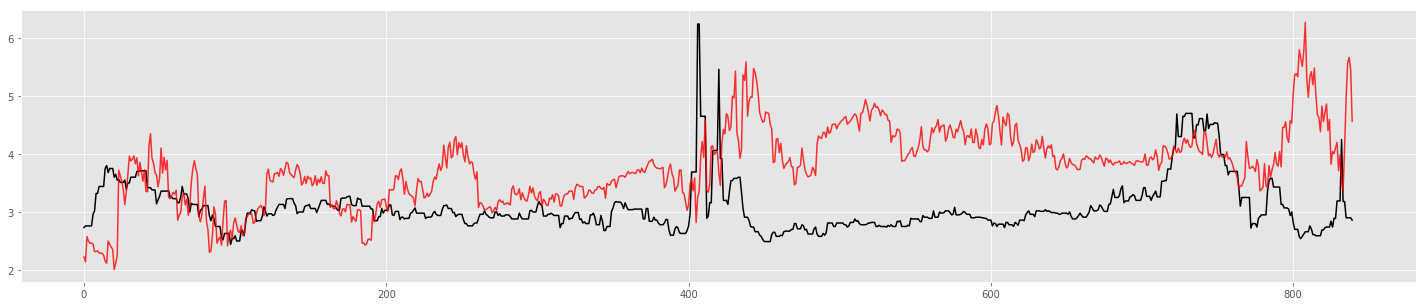

In [292]:
fig, axs = plt.subplots(figsize=(25, 5))
axs.plot(y_test, color='black')
axs.plot(predictions9, color='red', alpha = 0.8)
#axs.set_xlim([300, 600])
#axs.set_ylim([-0.2, .2])
plt.show()

In [293]:
ung_df = pd.read_csv('data/UNG.csv')
ung_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,337.920013,341.119995,332.799988,340.480011,340.480011,743700
1,2010-01-05,337.279999,338.239990,326.079987,330.239990,330.239990,718900
2,2010-01-06,338.880005,350.399994,337.600006,346.559998,346.559998,1270200
3,2010-01-07,343.359985,350.720001,334.079987,339.519989,339.519989,1310400
4,2010-01-08,329.600006,333.760010,328.959991,333.119995,333.119995,873500


In [295]:
ung_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 7 columns):
Date         2331 non-null object
Open         2331 non-null float64
High         2331 non-null float64
Low          2331 non-null float64
Close        2331 non-null float64
Adj Close    2331 non-null float64
Volume       2331 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 127.6+ KB


In [296]:

def df_cleaner_ung(df):
    df['Date'] = pd.to_datetime(df['Date'])
    return df
ung_df_cl = df_cleaner_ung(ung_df)

In [298]:
ung_df_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 7 columns):
Date         2331 non-null datetime64[ns]
Open         2331 non-null float64
High         2331 non-null float64
Low          2331 non-null float64
Close        2331 non-null float64
Adj Close    2331 non-null float64
Volume       2331 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 127.6 KB


In [727]:
small_df= df[1600:2900]

In [728]:
small_df.head(1)

,Temp,Production MMCF,Storage BCFE,Reserves BCFE,Consumption MMCF,DOY,MOY,WOY,one_week_back_temp,two_week_back_temp,three_week_back_temp,four_week_back_temp,one_back
1600,62.011,2356978.0,1160.0,322670.0,2741240.0,140,5,21,54.795,57.1001,49.0692,56.0406,4.47


In [729]:
small_y = y[1600:2900]

In [730]:
Xs = small_df.values

In [731]:
size = int(len(Xs) * 0.75)
X_train, X_test, y_train, y_test = Xs[0:size], Xs[size:len(X)], small_y[0:size], small_y[size:len(y)]

In [732]:
X_train, X_test, y_train, y_test 
history_X = X_train
history_y = y_train
predictions10 = list()
rfr = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=80,
           max_features=1, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=8, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)
rfr_fit = rfr.fit(X_train, y_train)
for t in range(len(y_test)):
    output = rfr_fit.predict(X_test[t].reshape((1,13)))
    yhat = output[0]
    predictions10.append(yhat)
#     obs = y_test[t]
#     history_X = np.append(history_X, X_test[t].reshape((1,6)), axis=0)
#     history_y = np.append(history_y,obs)
    #print('{} of {} predicted={}, expected={}'.format(t, len(y_test), yhat, obs))
pred = np.array(predictions10)
error = mean_squared_error(y_test, predictions10)
print('Test MSE: %.5f' % error)

# plt.plot(test)
# plt.plot(predictions, color='red')
# plt.show()

Test MSE: 0.04457


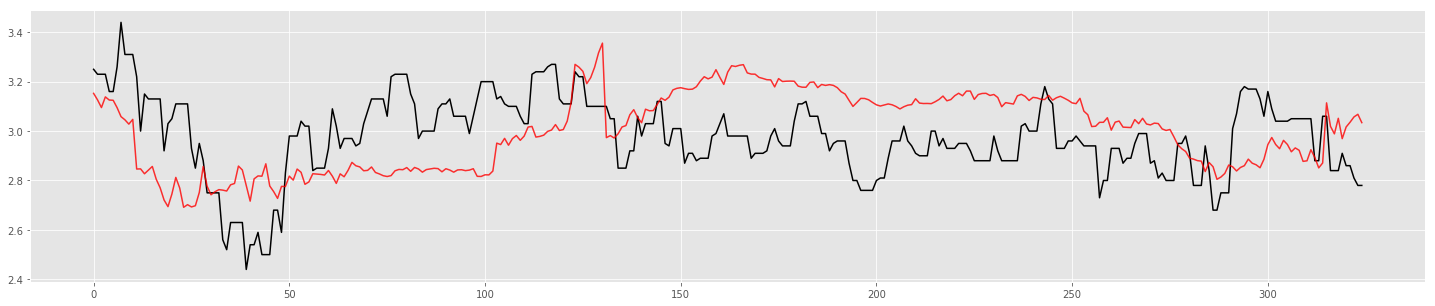

In [733]:
fig, axs = plt.subplots(figsize=(25, 5))
axs.plot(y_test, color='black')
axs.plot(predictions10, color='red', alpha = 0.8)
#axs.set_xlim([300, 600])
#axs.set_ylim([-0.2, .2])
plt.show()

In [734]:
X_train, X_test, y_train, y_test 
history_X = X_train
history_y = y_train
predictions11 = list()
gbr = GradientBoostingRegressor(learning_rate=0.1, n_estimators=200, max_leaf_nodes=20, min_samples_leaf =10,
                               max_features=1)
gbr_fit = gbr.fit(X_train, y_train)
for t in range(len(y_test)):
    output = gbr_fit.predict(X_test[t].reshape((1,13)))
    yhat = output[0]
    predictions11.append(yhat)
#     obs = y_test[t]
#     history_X = np.append(history_X, X_test[t].reshape((1,6)), axis=0)
#     history_y = np.append(history_y,obs)
    #print('{} of {} predicted={}, expected={}'.format(t, len(y_test), yhat, obs))
pred = np.array(predictions11)
error = mean_squared_error(y_test, predictions11)
print('Test MSE: %.5f' % error)

# plt.plot(test)
# plt.plot(predictions, color='red')
# plt.show()

Test MSE: 0.02759


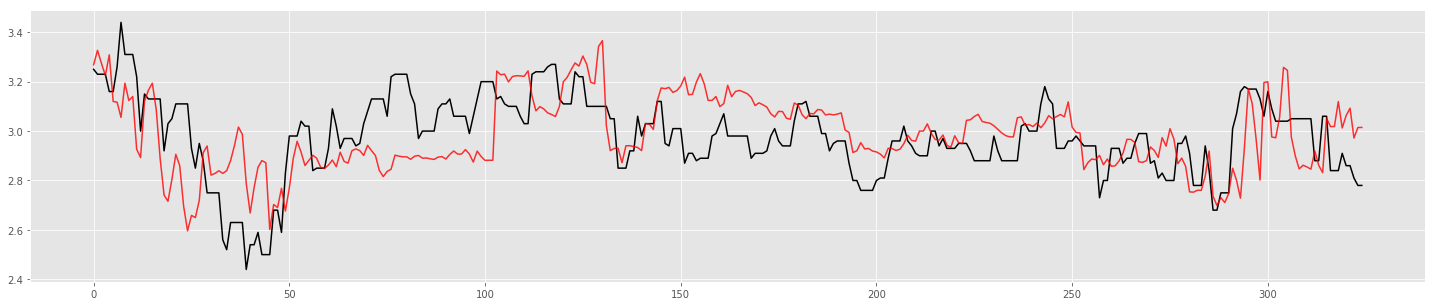

In [735]:
fig, axs = plt.subplots(figsize=(25, 5))
axs.plot(y_test, color='black')
axs.plot(predictions11, color='red', alpha = 0.8)
#axs.set_xlim([300, 600])
#axs.set_ylim([-0.2, .2])
plt.show()

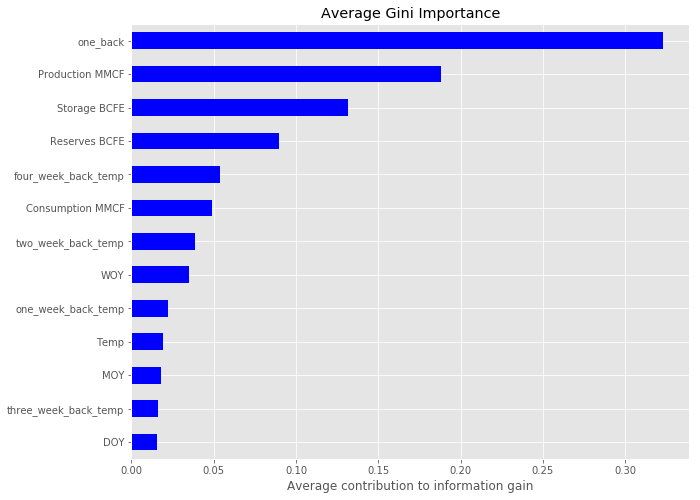

In [736]:
# Plot the feature importance
feat_scores = pd.Series(gbr.feature_importances_,
                           index=small_df.columns)
feat_scores = feat_scores.sort_values()
ax = feat_scores.plot(kind='barh', 
                      figsize=(10,8),
                      color='b')
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution to information gain');

In [737]:
nol_smalldf = small_df[nol]

In [738]:
Xs2 = nol_smalldf.values

In [739]:
size = int(len(Xs2) * 0.75)
X_train, X_test, y_train, y_test = Xs2[0:size], Xs2[size:len(X)], small_y[0:size], small_y[size:len(y)]

In [740]:
X_train, X_test, y_train, y_test 
history_X = X_train
history_y = y_train
predictions10 = list()
rfr = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=80,
           max_features=1, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=8, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)
rfr_fit = rfr.fit(X_train, y_train)
for t in range(len(y_test)):
    output = rfr_fit.predict(X_test[t].reshape((1,12)))
    yhat = output[0]
    predictions10.append(yhat)
#     obs = y_test[t]
#     history_X = np.append(history_X, X_test[t].reshape((1,6)), axis=0)
#     history_y = np.append(history_y,obs)
    #print('{} of {} predicted={}, expected={}'.format(t, len(y_test), yhat, obs))
pred = np.array(predictions10)
error = mean_squared_error(y_test, predictions10)
print('Test MSE: %.5f' % error)

# plt.plot(test)
# plt.plot(predictions, color='red')
# plt.show()

Test MSE: 0.07832


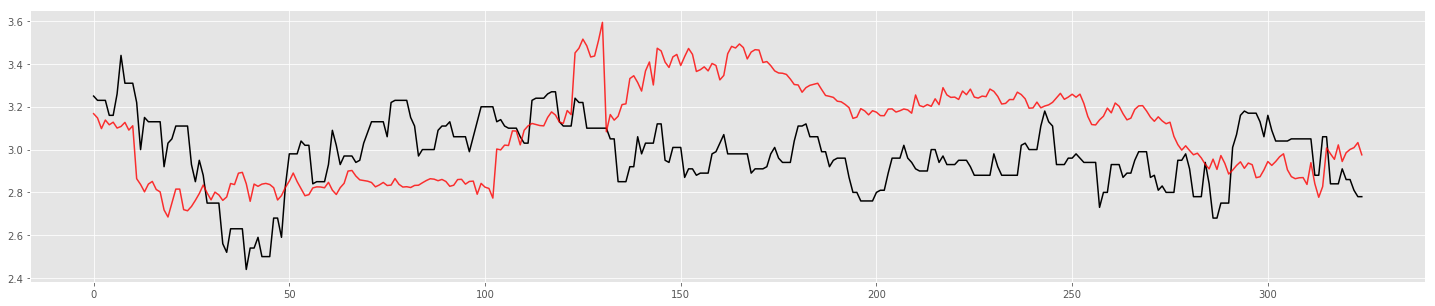

In [741]:
fig, axs = plt.subplots(figsize=(25, 5))
axs.plot(y_test, color='black')
axs.plot(predictions10, color='red', alpha = 0.8)
#axs.set_xlim([300, 600])
#axs.set_ylim([-0.2, .2])
plt.show()

In [742]:
X_train, X_test, y_train, y_test 
history_X = X_train
history_y = y_train
predictions11 = list()
gbr = GradientBoostingRegressor(learning_rate=0.2, n_estimators=1000, max_leaf_nodes=20, min_samples_leaf =10,
                               max_features=1)
gbr_fit = gbr.fit(X_train, y_train)
for t in range(len(y_test)):
    output = gbr_fit.predict(X_test[t].reshape((1,12)))
    yhat = output[0]
    predictions11.append(yhat)
#     obs = y_test[t]
#     history_X = np.append(history_X, X_test[t].reshape((1,6)), axis=0)
#     history_y = np.append(history_y,obs)
    #print('{} of {} predicted={}, expected={}'.format(t, len(y_test), yhat, obs))
pred = np.array(predictions11)
error = mean_squared_error(y_test, predictions11)
print('Test MSE: %.5f' % error)

# plt.plot(test)
# plt.plot(predictions, color='red')
# plt.show()

Test MSE: 0.17131


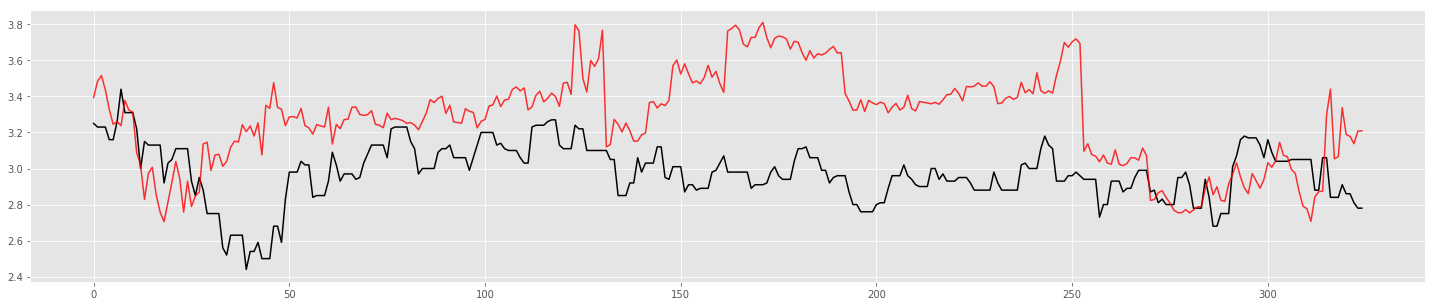

In [743]:
fig, axs = plt.subplots(figsize=(25, 5))
axs.plot(y_test, color='black')
axs.plot(predictions11, color='red', alpha = 0.8)
#axs.set_xlim([300, 600])
#axs.set_ylim([-0.2, .2])
plt.show()

In [752]:
norev = ['Temp', 'Production MMCF', 'Storage BCFE',
       'Consumption MMCF', 'DOY', 'MOY', 'WOY', 'one_week_back_temp',
       'two_week_back_temp', 'three_week_back_temp', 'four_week_back_temp','one_back']

In [753]:
norev_smalldf = small_df[norev]

In [754]:
Xs3 = norev_smalldf.values

In [755]:
size = int(len(Xs2) * 0.75)
X_train, X_test, y_train, y_test = Xs3[0:size], Xs3[size:len(X)], small_y[0:size], small_y[size:len(y)]

In [765]:
X_train, X_test, y_train, y_test 
history_X = X_train
history_y = y_train
predictions12 = list()
rfr = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=80,
           max_features=12, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=10,
           min_samples_split=8, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)
rfr_fit = rfr.fit(X_train, y_train)
for t in range(len(y_test)):
    output = rfr_fit.predict(X_test[t].reshape((1,12)))
    yhat = output[0]
    predictions12.append(yhat)
#     obs = y_test[t]
#     history_X = np.append(history_X, X_test[t].reshape((1,6)), axis=0)
#     history_y = np.append(history_y,obs)
    #print('{} of {} predicted={}, expected={}'.format(t, len(y_test), yhat, obs))
pred = np.array(predictions12)
error = mean_squared_error(y_test, predictions12)
print('Test MSE: %.5f' % error)

# plt.plot(test)
# plt.plot(predictions, color='red')
# plt.show()

Test MSE: 0.04213


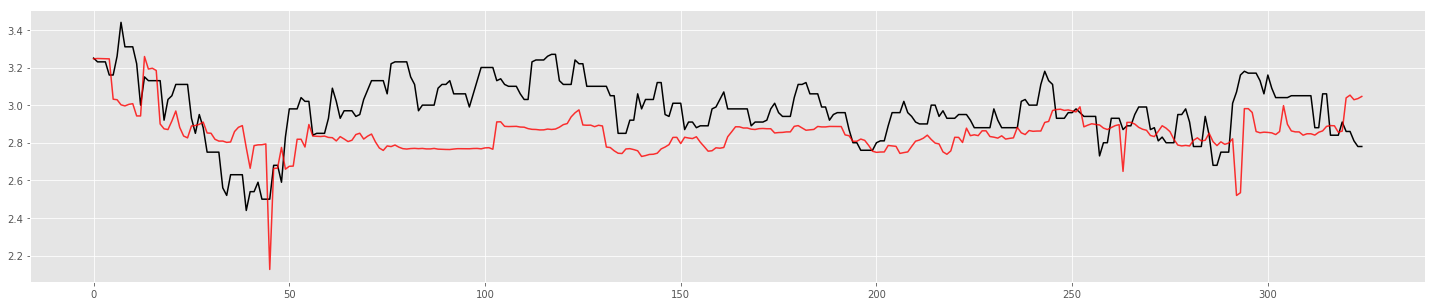

In [766]:
fig, axs = plt.subplots(figsize=(25, 5))
axs.plot(y_test, color='black')
axs.plot(predictions12, color='red', alpha = 0.8)
#axs.set_xlim([300, 600])
#axs.set_ylim([-0.2, .2])
plt.show()

In [763]:
X_train, X_test, y_train, y_test 
history_X = X_train
history_y = y_train
predictions13 = list()
gbr = GradientBoostingRegressor(learning_rate=0.2, n_estimators=200, max_leaf_nodes=100, min_samples_leaf =100,
                               max_features=2)
gbr_fit = gbr.fit(X_train, y_train)
for t in range(len(y_test)):
    output = gbr_fit.predict(X_test[t].reshape((1,12)))
    yhat = output[0]
    predictions13.append(yhat)
#     obs = y_test[t]
#     history_X = np.append(history_X, X_test[t].reshape((1,6)), axis=0)
#     history_y = np.append(history_y,obs)
    #print('{} of {} predicted={}, expected={}'.format(t, len(y_test), yhat, obs))
pred = np.array(predictions13)
error = mean_squared_error(y_test, predictions13)
print('Test MSE: %.5f' % error)

# plt.plot(test)
# plt.plot(predictions, color='red')
# plt.show()

Test MSE: 0.08176


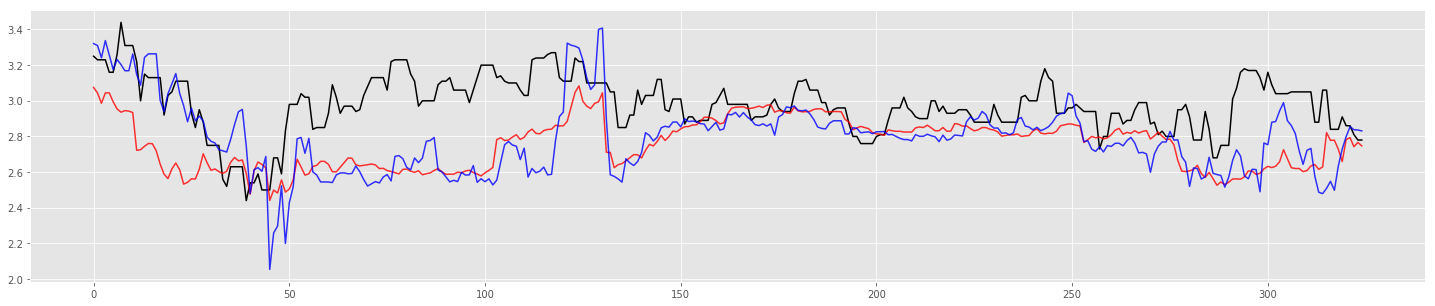

In [764]:
fig, axs = plt.subplots(figsize=(25, 5))
axs.plot(y_test, color='black')
axs.plot(predictions12, color='red', alpha = 0.8)
axs.plot(predictions13, color='blue', alpha = 0.8)
#axs.set_xlim([300, 600])
#axs.set_ylim([-0.2, .2])
plt.show()